# AIT Development notebook


## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|3|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit(second cell, you set use modules.)|
| 4|import|2|you should write use import modules.<br>but bottom lines do not edit.|should edit(first cell, you import your moduel.)|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

## notebook template revision history

### 1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

### 1.0.0 2020/10/12

* new cerarion

In [ ]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re

    def numericalSort(value):
        numbers = re.compile(r'(\d+)')
        parts = numbers.split(value)
        parts[1::2] = map(int, parts[1::2])
        return parts
    latest_sdk_file_path=sorted(glob('../lib/*.whl'), key=numericalSort)[-1]

    ait_sdk_name = Path(latest_sdk_file_path).name
    
    # copy to develop dir
    import shutil
    current_dir = %pwd
    shutil.copyfile(f'../lib/{ait_sdk_name}', f'{current_dir}/{ait_sdk_name}')

    # install ait-sdk
    !pip install --upgrade pip
    !pip install --force-reinstall ./$ait_sdk_name

     |████████████████████████████████| 1.5 MB 4.5 MB/s eta 0:00:01:01     |█████▏                          | 245 kB 4.5 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.3.1
    Uninstalling pip-20.3.1:
      Successfully uninstalled pip-20.3.1
Processing ./ait_sdk-0.1.5-py3-none-any.whl
  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Using cached entrypoints-0.3-py2.py3-none-any.whl (11 kB)
  Using cached Jinja2-2.11.2-py2.py3-none-any.whl (125 kB)
  Using cached MarkupSafe-1.1.1-cp36-cp36m-manylinux1_x86_64.whl (27 kB)
  Using cached mistune-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached nbclient-0.5.1-py3-none-any.whl (65 kB)
     |████████████████████████████████| 108 kB 4.8 MB/s eta 0:00:01
  Using cached jupyter_core-4.7.0-py3-none-any.whl (82 kB)
  Using cached nbformat-5.0.8-py3-none-any.whl (172 kB)
  Using cached jsonschema-3.2.0-py2.py3-none-any.whl (56 kB)
  Using cached attrs-20.3.0-py2.py3-none-any.whl (49 kB)
     |██████

In [3]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

In [4]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package('tensorflow', '2.4.0')
    requirements_generator.add_package('pandas', '1.1.1')
    requirements_generator.add_package('matplotlib', '3.3.1')
    requirements_generator.add_package('seaborn', '0.10.1')

In [5]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

Processing ./ait_sdk-0.1.5-py3-none-any.whl
     |████████████████████████████████| 11.6 MB 7.2 MB/s eta 0:00:01    |▊                               | 266 kB 4.3 MB/s eta 0:00:03     |████████▊                       | 3.1 MB 4.3 MB/s eta 0:00:02     |██████████                      | 3.6 MB 4.3 MB/s eta 0:00:02
     |████████████████████████████████| 10.5 MB 6.8 MB/s eta 0:00:01     |███████████████████████████████▌| 10.3 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 14.1 MB/s eta 0:00:01
     |████████████████████████████████| 394.7 MB 15 kB/s s eta 0:00:01  |▏                               | 1.5 MB 6.8 MB/s eta 0:00:58     |▎                               | 3.1 MB 6.8 MB/s eta 0:00:58     |▊                               | 8.2 MB 6.8 MB/s eta 0:00:58     |█▎                              | 16.1 MB 12.9 MB/s eta 0:00:30     |█▊                              | 21.1 MB 13.3 MB/s eta 0:00:29     |██                              | 23.3 MB 13.3 MB/s eta 0:00:28     |

In [6]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
import tensorflow as tf
import csv
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from os import makedirs, path

In [7]:
#########################################
# area:import
# do not edit
#########################################

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [8]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_regression_analyze_rmse_and_mae_tf2.3')
    manifest_genenerator.set_ait_description('''Calculate the RMSE and MAE of a model of multiple regression analysis constructed with one objective variable and multiple explanatory variables.
    Both RMSE (short for Root Mean Square Error) and MAE (short for Mean Absolute Error) represent the size of the averaged error.
Number of data n, true values: y(1),y(2),⋯,y(n) Predicted values: f(1),f(2),⋯,f(n) Let the values you seek be RMSE and MAE, respectively.
    RMSE = √( ( ( 1 / n ) * ( Σ[i=1→n] ( (( f ( i ) - y ( i ) ) ^2 ) )
    MAE = ( 1 / n ) * ( Σ[i=1→n] ( | f ( i ) - y ( i ) | )
    ''')
    manifest_genenerator.set_ait_author('AIST')
    manifest_genenerator.set_ait_email('')
    manifest_genenerator.set_ait_version('0.1')
    manifest_genenerator.set_ait_quality('https://airc.aist.go.jp/aiqm/quality/internal/Accuracy_of_trained_model')
    manifest_genenerator.set_ait_reference('')
    manifest_genenerator.add_ait_inventories(name='trained_model', 
                                             type_='model', 
                                             description='Tensorflow 2.3 model', 
                                             format_=['h5'], 
                                             schema='HDF5')
    manifest_genenerator.add_ait_inventories(name='dataset_for_verification', 
                                             type_='dataset', 
                                             description='Data set for verification requires label',
                                             format_=['csv'], 
                                             schema='csv for verification')
    manifest_genenerator.add_ait_parameters(name='target_variable', 
                                            type_='str', 
                                            description='target variable', 
                                            default_val='')
    manifest_genenerator.add_ait_measures(name='RMSE', 
                                          type_='float', 
                                          description='The closer to 0, the smaller prediction error.',
                                          structure='single')
    manifest_genenerator.add_ait_measures(name='MAE', 
                                          type_='float', 
                                          description='The closer to 0, the smaller prediction error.',
                                          structure='single')
    manifest_genenerator.add_ait_resources(name='evaluation_index_matrix', 
                                           type_='table', 
                                           description='Table of evaluation indicators summary.')
    manifest_genenerator.add_ait_resources(name='observed_predicted_plot', 
                                           type_='picture', 
                                           description='Plot of actual values on the horizontal axis and predictions on the vertical axis. The more plots exist near the diagonal line, the better the prediction.')
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AIT_log')
    manifest_path = manifest_genenerator.write()

In [9]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='trained_model',
                                        value='trained_model/model_2.h5')
    input_generator.add_ait_inventories(name='dataset_for_verification',
                                        value='dataset_for_verification/test_dataset.csv')
    input_generator.set_ait_params(name='target_variable',
                                   value='Happiness Score')
    input_generator.write()

In [10]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [11]:
#########################################
# area:functions
# should edit
#########################################
@log(logger)
@measures(ait_output, 'RMSE')
def measure_rmse(rmse):
    return float(str(rmse.numpy()))

In [12]:
#########################################
# area:functions
# should edit
#########################################
@log(logger)
@measures(ait_output, 'MAE')
def measure_mae(mae):
    return float(str(mae))

In [13]:
#########################################
# area:functions
# should edit
#########################################
@log(logger)
@resources(ait_output, path_helper, 'evaluation_index_matrix', 'evaluation_index_matrix.csv')
def save_index_matrix(csv_data, file_path: str=None) -> None:
    
    with open(file_path, 'w') as f:
            writer = csv.writer(f, lineterminator='\n')
            writer.writerows(csv_data)
    return file_path


In [14]:
#########################################
# area:functions
# should edit
#########################################
@log(logger)
@resources(ait_output, path_helper, 'observed_predicted_plot', 'correlation_graph_of_predicted_and_measured_values.png')
def save_predicted_plot(model, test_data_labels, normed_test_data, file_path: str=None) -> None:

    sns.set_style("whitegrid")
    test_predictions = model.predict(normed_test_data).flatten()
    df_fact = pd.DataFrame({'measured value': test_data_labels.values, 
                                'predicted value': test_predictions})
    sns_plt = sns.jointplot("predicted value", "measured value", 
                                data=df_fact, kind="reg", 
                                line_kws={'color':'red'}, height=8, 
                                scatter_kws={"s": 4})
    sns_plt.savefig(file_path)
    return file_path


In [15]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> None:

    shutil.move(get_log_path(), file_path)

In [16]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper)
def main() -> None:

    # model読み込み
    trained_model_path = ait_input.get_inventory_path('trained_model')
    model = tf.keras.models.load_model(trained_model_path)

    # data読み込み
    dataset_for_verification_path = ait_input.get_inventory_path('dataset_for_verification')
    with open(dataset_for_verification_path) as f:
        test_dataset = pd.read_csv(f)

    # 目的変数読み込み
    target_variables = [ait_input.get_method_param_value('target_variable')]

    # data加工、転置
    test_data_stats = test_dataset.describe()
    for t in target_variables:
        test_data_stats.pop(t)
        test_data_stats = test_data_stats.transpose()

    # label抽出
    for t in target_variables:
        test_data_labels = test_dataset.pop(t)

    # 正規化
    normed_test_data = (test_dataset - test_data_stats['mean']) / test_data_stats['std']

    # 実際の値
    Y = tf.Variable(test_data_labels, name='Y')

    # 予測値
    pred = model.predict(normed_test_data.values).flatten()

    # RMSEの計算、MAEとMSEの計算
    loss, mae, mse = model.evaluate(normed_test_data, test_data_labels, verbose=2)
    rmse = tf.sqrt(tf.reduce_mean((Y - pred)**2))
    csv_data = [['RMSE(Root Mean Square Error)', rmse.numpy()],
                ['MAE(Mean Absolute Error)',     mae],
                ['MSE(Mean Squared Error)',      mse]]
                    
    # measure rmse
    measure_rmse(rmse)

    # measure mae
    measure_mae(mae)

    # resource evaluation_index_matrix
    save_index_matrix(csv_data)

    # resource observed_predicted_plot
    save_predicted_plot(model, test_data_labels, normed_test_data)

    # downloads Log
    move_log()


5/5 - 0s - loss: 0.4006 - mean_absolute_error: 0.5150 - mean_squared_error: 0.4006


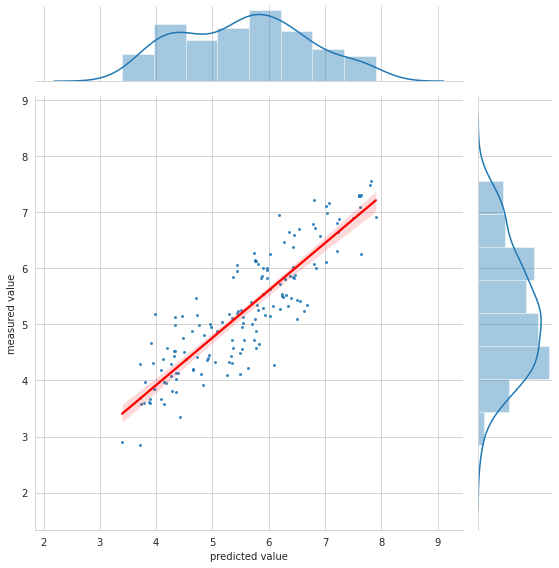

In [17]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [18]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2020'

In [19]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_manifest, ait_sdk_name, current_dir, requirements_path, is_remote_deploy=True)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
